<a href="https://colab.research.google.com/github/lurwan2107/ArewaDS_DeepLearning/blob/main/02_PyTorch_nn_Classification_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch NN Classification Exercise
------------------------------------------
This notebook contains solutions to all the exercise in PyTorch classification and it's categorize into 2 parts.
## First Part: Binary Classification
That involves classifying one thing or another.

In [8]:
import torch

# Setting up device agonisic
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Declaring random seed
RANDOM_SEED = 42
device

'cuda'

### Q1. Make a binary classification dataset with Scikit-Learn's `make_moons()` function.
`(a)` For consistency, the dataset should have 1000 samples and a `random_state=42`.


In [2]:
# Craeting the dataset with Scikit-Learn's make_moon() method
from sklearn.datasets import make_moons

# Setting size of the datasets to be 1000 samples
n_samples = 1000

# Creating make_moon dataset
X, Y = make_moons(
    n_samples,
    noise=0.03,
    random_state=RANDOM_SEED
)

# Let's view the first 5 x and y to take a quick look of our data
X[:5], Y[:5]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908]]),
 array([1, 1, 1, 1, 0]))

Looks like each 1 `Y` label has 2 corresponding `X` features.  

In [3]:
# Turning the data into DataFrame of moons data
import pandas as pd
moons = pd.DataFrame({'X1':X[:, 0],
                      'X2':X[:, 1],
                      'labels':Y})

moons.head(10)

,X1,X2,labels
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
5,0.579542,-0.352979,1
6,0.294884,-0.209238,1
7,-0.014488,0.435896,1
8,1.626510,-0.281207,1
9,0.671598,0.786422,0


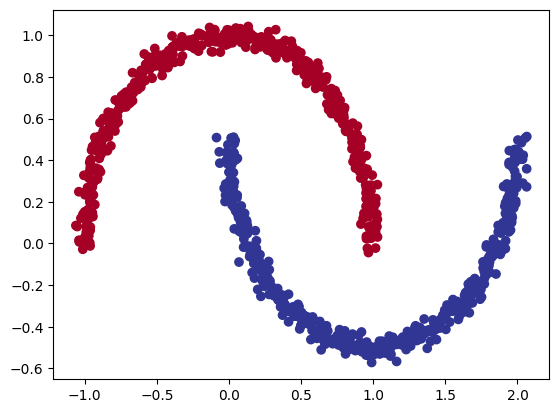

In [4]:
# Now we'll visualize our datasets
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=Y, cmap=plt.cm.RdYlBu);

`(b)` Turn the data into PyTorch tensors.

In [5]:
# Turning our data into PyTorch tensor
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

# printing first 5 values of X and Y
X[:5], Y[:5]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

`(c)` Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [6]:
# Splitting the data into train and test set train_test_split() method
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)

len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Q2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
- Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [7]:
import torch
from torch import  nn

# Let's start our deep learning model with small layers and small hidden neurons for easy troublshooting
# Constructing a model by subclassing nn.Module
class MoonsModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # I will use linear layer for now and see how my model will perform
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # Defining forward pass method
    def forward(self, X):
        return self.layer_2(self.layer_1(X))

# Instatiating our model and putting it to device
model_0 = MoonsModelV0().to(device)
model_0

MoonsModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

### Q3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [9]:
# Creating loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() # Is the compatible loss function for binary classificatio

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### Q4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
`(a)` Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.

In [10]:
# Let's do a forward pass and see what's coming out of our model

# Logits raw output
y_logits = model_0(x_test.to(device))
print(f'Logits:\n{y_logits[:5]}')

# Predictions probabilities
y_pred_probs = torch.sigmoid(y_logits) # I use sigmoid on the model logits
print(f"Pred Probs:\n{y_pred_probs[:5]}")

# Prediction labels
y_preds = torch.round(y_pred_probs)
print(f"Pred labels:\n{y_preds.squeeze()[:5]}")

Logits:
tensor([[0.2860],
        [0.1756],
        [0.4467],
        [0.1260],
        [0.5105]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred Probs:
tensor([[0.5710],
        [0.5438],
        [0.6098],
        [0.5315],
        [0.6249]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SliceBackward0>)


`(b)` To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.

In [11]:
# Let's create accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

`(c)` Train the model for long enough for it to reach over 96% accuracy.
- The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [12]:
torch.manual_seed(RANDOM_SEED)

epochs = 100

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass, mmodel output (raw logits)
    y_logits = model_0(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.62214, Accuracy: 78.00% | Test Loss: 0.62177, Test Acc: 75.50%
Epoch: 10 | Loss: 0.54470, Accuracy: 78.25% | Test Loss: 0.55347, Test Acc: 75.50%
Epoch: 20 | Loss: 0.48289, Accuracy: 79.00% | Test Loss: 0.49830, Test Acc: 74.50%
Epoch: 30 | Loss: 0.43510, Accuracy: 79.88% | Test Loss: 0.45519, Test Acc: 75.00%
Epoch: 40 | Loss: 0.39973, Accuracy: 81.00% | Test Loss: 0.42249, Test Acc: 76.50%
Epoch: 50 | Loss: 0.37358, Accuracy: 81.25% | Test Loss: 0.39738, Test Acc: 77.50%
Epoch: 60 | Loss: 0.35368, Accuracy: 82.00% | Test Loss: 0.37741, Test Acc: 80.50%
Epoch: 70 | Loss: 0.33793, Accuracy: 82.50% | Test Loss: 0.36090, Test Acc: 80.50%
Epoch: 80 | Loss: 0.32503, Accuracy: 83.12% | Test Loss: 0.34685, Test Acc: 81.50%
Epoch: 90 | Loss: 0.31416, Accuracy: 83.75% | Test Loss: 0.33463, Test Acc: 81.50%


To visualize the performance of our model let's download a helper function and decision boundary function

In [14]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


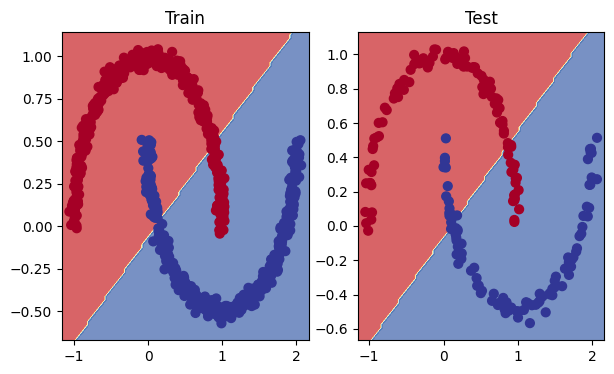

In [15]:
# Plotting decision boundary
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, x_test, y_test)

### Since our model is not fitting the data, now i will combine both linear and non-linear activation function.

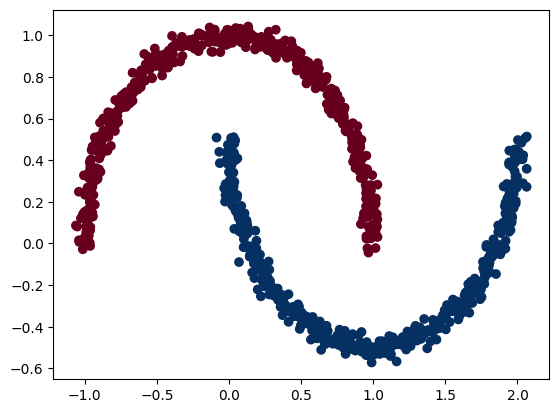

In [16]:
# Creating the make_moons() dataset
import matplotlib.pyplot as plt
from sklearn.datasets import  make_moons

RANDOM_SEED = 42
n_samples = 1000

X, Y = make_moons(n_samples, noise=0.03, random_state=RANDOM_SEED)

plt.scatter(x=X[:, 0], y=X[:, 1], c=Y, cmap=plt.cm.RdBu);

In [17]:
# Turning the data to tensor
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [19]:
# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)

len(x_train), len(y_train), len(x_test), len(y_test)

(800, 800, 200, 200)

In [20]:
from torch import nn
class MoonsModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Adding the layers and increasing the hidden nuerons
        self.linear_layer_1 = nn.Linear(in_features=2, out_features=10)
        self.linear_layer_2 = nn.Linear(in_features=10, out_features=10)
        self.linear_layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = torch.nn.ReLU() # non-linear layer

    def forward(self, X):
        return self.linear_layer_3(self.relu(self.linear_layer_2(self.relu(self.linear_layer_1(X)))))

model_2 = MoonsModelV2().to(device)
model_2

MoonsModelV2(
  (linear_layer_1): Linear(in_features=2, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [21]:
# Setting up loss and optimization function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [22]:
torch.manual_seed(RANDOM_SEED)

# Increasing the number of epochs
epochs = 1000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_2.train()
    # 1. Forward pass
    y_logits = model_2(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculating loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_2(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculating loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69537, Accuracy: 37.75% | Test Loss: 0.69457, Test Acc: 49.50%
Epoch: 100 | Loss: 0.38636, Accuracy: 81.88% | Test Loss: 0.40196, Test Acc: 77.00%
Epoch: 200 | Loss: 0.23664, Accuracy: 88.62% | Test Loss: 0.23758, Test Acc: 90.00%
Epoch: 300 | Loss: 0.19082, Accuracy: 91.38% | Test Loss: 0.18528, Test Acc: 92.50%
Epoch: 400 | Loss: 0.15147, Accuracy: 93.75% | Test Loss: 0.14452, Test Acc: 94.00%
Epoch: 500 | Loss: 0.10692, Accuracy: 95.62% | Test Loss: 0.09974, Test Acc: 97.50%
Epoch: 600 | Loss: 0.06902, Accuracy: 98.50% | Test Loss: 0.06298, Test Acc: 99.00%
Epoch: 700 | Loss: 0.04417, Accuracy: 99.75% | Test Loss: 0.03936, Test Acc: 99.50%
Epoch: 800 | Loss: 0.03007, Accuracy: 100.00% | Test Loss: 0.02625, Test Acc: 100.00%
Epoch: 900 | Loss: 0.02188, Accuracy: 100.00% | Test Loss: 0.01887, Test Acc: 100.00%


Ho ho! That's looking far better, the loss is going down and the accuracy going up to 100%

### Q5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [23]:
# Making predictions
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(x_test))).squeeze()

y_preds[:5], Y[:5]

(tensor([1., 0., 1., 0., 1.], device='cuda:0'), tensor([1., 1., 1., 1., 0.]))

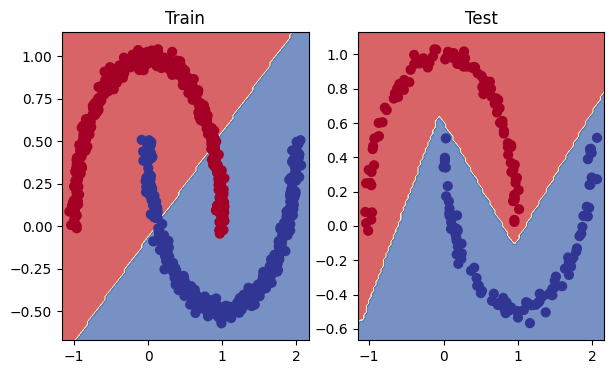

In [25]:
# Plotting the decision boundary
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_2, x_test, y_test)

Huhhh! My model fit the data perfectly

### Q6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch

In [26]:
# Let's create a small amount of PyTorch data to replicate (Tanh activation function)
B = torch.arange(-10, 10, 1, dtype=torch.float32)
B

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [27]:
# Creating function to replicate Tanh
def Tanh(z):
    return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))

Tanh(B)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9993, -0.9951,
        -0.9640, -0.7616,  0.0000,  0.7616,  0.9640,  0.9951,  0.9993,  0.9999,
         1.0000,  1.0000,  1.0000,  1.0000])

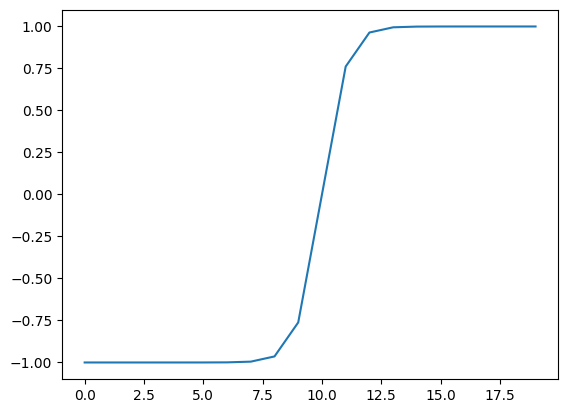

In [28]:
# Plotting the Tanh activation function
plt.plot(Tanh(B));

## Second Part: Multiclass Calssification.
That involves classifying something from a list of more than two options.
### Q7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
- Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).


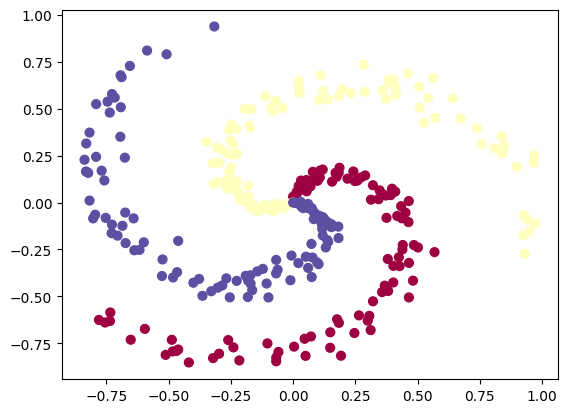

In [29]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
Y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  Y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [30]:
# Turn the data to tensor
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.LongTensor)

X[:5], Y[:5]

(tensor([[ 0.0000,  0.0000],
         [-0.0011,  0.0100],
         [ 0.0053,  0.0195],
         [-0.0006,  0.0303],
         [ 0.0078,  0.0397]]),
 tensor([0, 0, 0, 0, 0]))

In [31]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

len(x_train), len(y_train), len(x_test), len(y_test)

(240, 240, 60, 60)

In [32]:
!pip -q install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 7.7 MB/s eta 0:00:00


In [33]:
# Calculating accuracy function
from torchmetrics import Accuracy

accuracy_fn = Accuracy(task='multiclass', num_classes=3).to(device)

In [56]:
# Creating a by inheriting from nn.Module and setting hyperparameters
NUM_FEATURES = 2
NUM_CLASSES = 3
NUM_NEURONS = 15
class SpiralModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()
        # Combination of linear and non-linear layer
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units), # Linear layer
            nn.ReLU(), # non linear layer
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, X):
        return self.linear_layer_stack(X)

# Instantiating the model and sending it to device
model_3 = SpiralModelV0(input_features = NUM_FEATURES,
                        output_features = NUM_CLASSES,
                        hidden_units = NUM_NEURONS).to(device)

model_3

SpiralModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=3, bias=True)
  )
)

In [57]:
# Setting up data to be agnostic
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Printing out the first 10 untrained model output (forward pass)
print("Logits: ")
y_logits = model_3(x_test)
print(y_logits[:10])

print("Pred Probs:")
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])

print("Pred labels:")
y_pred_labels = torch.round(y_pred_probs)
print(y_pred_labels[:10])

Logits: 
tensor([[ 0.1174,  0.0066, -0.1597],
        [ 0.0696,  0.0018, -0.1254],
        [ 0.1285, -0.0134, -0.1563],
        [ 0.1210,  0.0031, -0.1601],
        [ 0.1093,  0.0192, -0.1622],
        [ 0.1165,  0.0173, -0.1627],
        [ 0.1315,  0.0562, -0.1718],
        [ 0.1112,  0.0057, -0.1582],
        [ 0.1187,  0.0044, -0.1594],
        [ 0.1441, -0.0550, -0.2317]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred Probs:
tensor([[0.3769, 0.3374, 0.2857],
        [0.3627, 0.3389, 0.2984],
        [0.3817, 0.3312, 0.2871],
        [0.3783, 0.3362, 0.2856],
        [0.3737, 0.3415, 0.2848],
        [0.3757, 0.3402, 0.2841],
        [0.3751, 0.3479, 0.2770],
        [0.3754, 0.3378, 0.2868],
        [0.3775, 0.3367, 0.2858],
        [0.3990, 0.3270, 0.2740]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred labels:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
       

- Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).


In [58]:
# Setting up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# I use Adam optimizer instead of SGD
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.1)

- Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).


In [61]:
# Model Training
torch.manual_seed(42)

# Number of epochs
epochs = 1000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_3.train()

    # 1. Forward pass
    y_logits = model_3(x_train)
    y_pred = torch.softmax(y_logits, dim=1)

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_pred, y_train) * 100

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss bacward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(x_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        # 2. Calculate loss and accuarcy function
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(test_pred, y_test) * 100

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.01415, Accuracy: 99.17% | Test Loss: 0.32994, Test Acc: 96.67%
Epoch: 100 | Loss: 0.01400, Accuracy: 99.17% | Test Loss: 0.30456, Test Acc: 96.67%
Epoch: 200 | Loss: 0.01398, Accuracy: 99.17% | Test Loss: 0.26976, Test Acc: 96.67%
Epoch: 300 | Loss: 0.01404, Accuracy: 99.17% | Test Loss: 0.25011, Test Acc: 96.67%
Epoch: 400 | Loss: 0.01401, Accuracy: 99.17% | Test Loss: 0.22063, Test Acc: 96.67%
Epoch: 500 | Loss: 0.01425, Accuracy: 99.17% | Test Loss: 0.16669, Test Acc: 96.67%
Epoch: 600 | Loss: 0.01397, Accuracy: 99.17% | Test Loss: 0.13437, Test Acc: 98.33%
Epoch: 700 | Loss: 0.01393, Accuracy: 99.17% | Test Loss: 0.14617, Test Acc: 98.33%
Epoch: 800 | Loss: 0.01397, Accuracy: 99.17% | Test Loss: 0.14506, Test Acc: 98.33%
Epoch: 900 | Loss: 0.01419, Accuracy: 99.17% | Test Loss: 0.18803, Test Acc: 98.33%


Huhhh! ✌ 😲 what a performance? My model achieved more than the requested percentage, my model performance is 98% 💪 victory.

- Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

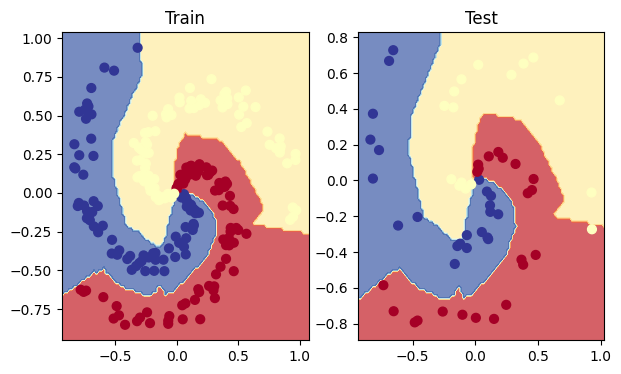

In [62]:
# Plotting the decision boundary
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test)